# Analysing mock datasets

In [1]:
# packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from itertools import combinations

import sys
sys.path.append("../src")

from analysis import *
from inference import *

In [2]:
import re

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)] 
    return sorted(l, key=alphanum_key)

In [3]:
datapath = "../experiment_outputs/test2/datasets/"
datafiles = os.listdir(datapath)
metadatafiles = [f"metadata{i.split('dataset')[1].split('csv')[0]}txt"\
                for i in datafiles]

datafiles = natural_sort(datafiles)
metadatafiles = natural_sort(metadatafiles)

In [4]:
n_sp = int(datafiles[-1].split("dataset")[1].split("_")[0])
print(f"{n_sp} species")

10 species


In [5]:
df = pd.read_csv(datapath+datafiles[-1], index_col=0)
metatext = open(f"{datapath}../metadata/"+metadatafiles[-1], "r").read().split("\n")
df

,dataset,init_cond_idx,t_samp_dist_idx,measurement_noise,replicate,time,dt,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,sp10
0,0.0,0.0,0.0,0.05,0.0,0.000000,3.333333,0.064363,0.002588,0.043327,0.247333,0.033040,0.224951,0.020655,0.008473,0.122478,0.204704
1,0.0,0.0,0.0,0.05,0.0,3.333333,3.333333,0.231648,0.005194,0.318090,0.266349,0.185124,0.159095,0.072504,0.008515,0.110750,0.149274
2,0.0,0.0,0.0,0.05,0.0,6.666667,3.333333,0.310142,0.008810,0.428725,0.238602,0.288226,0.137129,0.078621,0.020070,0.129993,0.093929
3,0.0,0.0,0.0,0.05,0.0,10.000000,3.333333,0.338583,0.010467,0.442916,0.240436,0.309441,0.132112,0.065272,0.050773,0.145067,0.074269
4,0.0,0.0,0.0,0.05,0.0,13.333333,3.333333,0.350218,0.009684,0.433680,0.235460,0.317127,0.124314,0.065388,0.080254,0.162688,0.067665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,59.0,19.0,2.0,0.05,0.0,25.862069,1.034483,0.365047,0.004071,0.426324,0.232213,0.328773,0.136411,0.021415,0.099540,0.176440,0.094119
1196,59.0,19.0,2.0,0.05,0.0,26.896552,1.034483,0.346965,0.004151,0.411545,0.229099,0.306443,0.139855,0.021869,0.099715,0.165658,0.088102
1197,59.0,19.0,2.0,0.05,0.0,27.931034,1.034483,0.361952,0.004205,0.400053,0.235234,0.309460,0.136731,0.023186,0.098796,0.159807,0.087925
1198,59.0,19.0,2.0,0.05,0.0,28.965517,1.034483,0.351081,0.004289,0.392634,0.230879,0.312688,0.131748,0.023629,0.102019,0.151044,0.084764


In [6]:
def get_meta(metatext):
    meta = {}
    for n, line in enumerate(metatext):
        if "initial conditions" in line:
            init_cond_ln_idx = n

        elif "sampling timepoints" in line:
            t_samp_ln_idx = n

        elif "parameters" in line:
            meta["parameters"] = np.array([np.float64(j) for j in line.split(": ")[1].split(",")])
            params_ln_idx = n
        
        elif "measurement noise" in line:
            meta["meas_noise"] = np.array([np.float64(j) for j in line.split(": ")[1].split(",")])
            meas_noise_ln_idx = n
            break

    meta["init_cond"] = np.array([[np.float64(i) for i in metatext[j].split(",")] \
                                  for j in range(init_cond_ln_idx+1, t_samp_ln_idx)])

    meta["t_samp"] = [np.array([np.float64(i) for i in metatext[j].split(",")]) \
                                  for j in range(t_samp_ln_idx+1, params_ln_idx)]

    meta["avg_dt"] = [np.diff(t).mean() for t in meta["t_samp"]]

    for i in range(meas_noise_ln_idx+1, len(metatext)-1):
        key, val = metatext[i].split(": ")
        meta[key] = np.float64(val)

    key, val = metatext[-1].split(": ")
    meta[key] = bool(val)

    return meta

In [7]:
metadict = get_meta(metatext)
metadict

{'parameters': array([ 9.67029839e-01,  5.47232249e-01,  9.72684360e-01,  7.14815994e-01,
         6.97728825e-01,  2.16089496e-01,  9.76274455e-01,  6.23025520e-03,
         2.52982362e-01,  4.34791532e-01, -3.53378924e+00,  4.71507229e-01,
        -5.04073461e-01,  5.41069831e-01,  1.37510571e+00, -1.82115555e-01,
        -1.33243783e+00,  1.19874169e+00, -5.55553833e-01, -2.06794185e-01,
        -1.48501580e+00, -3.83885704e+00,  3.04207731e-01, -6.53161044e-01,
         3.00644118e-01, -3.90209572e-01, -6.60148663e-01, -1.64160448e+00,
         9.27557233e-01,  1.38763017e-01,  1.66166806e+00,  1.19182201e+00,
        -3.67342629e+00,  6.30599306e-01, -8.51558098e-01,  1.24506127e-01,
         1.66538450e+00,  2.53334327e-01,  4.56323426e-01, -9.68217529e-01,
        -2.44274905e-01, -1.92227331e-01,  5.59719885e-01, -3.83640003e+00,
        -6.86110018e-01,  1.89529718e+00,  1.72150012e+00,  9.84880200e-01,
        -4.58305892e-01, -6.97804410e-01, -2.45663618e-01,  1.37204635e+00

In [8]:
df.columns

Index(['dataset', 'init_cond_idx', 't_samp_dist_idx', 'measurement_noise',
       'replicate', 'time', 'dt', 'sp1', 'sp2', 'sp3', 'sp4', 'sp5', 'sp6',
       'sp7', 'sp8', 'sp9', 'sp10'],
      dtype='object')

In [9]:
(df[[i for i in df.columns if i[:2]=="sp"]]<0).values.sum()

0

In [10]:
print(f"No of initial conditions:", len(df.init_cond_idx.unique()))
print(f"No of sampling timepoint distributions:", len(df.t_samp_dist_idx.unique()))
print(f"Measurement noise values:", df.measurement_noise.unique())
print(f"No of replicates:", len(df.replicate.unique()))

No of initial conditions: 20
No of sampling timepoint distributions: 3
Measurement noise values: [0.05]
No of replicates: 1


In [11]:
param_columns = [f"r{i}" for i in range(1, n_sp+1)] + \
                [f"A{i},{j}" for i in range(1, n_sp+1) for j in range(1, n_sp+1)]

cols = ["n_init_cond"] + list(df.columns[1:4]) + param_columns + ["MSPD", "MASI"]

infer_out = pd.DataFrame(columns=cols)
infer_out

,n_init_cond,init_cond_idx,t_samp_dist_idx,measurement_noise,r1,r2,r3,r4,r5,r6,...,"A10,3","A10,4","A10,5","A10,6","A10,7","A10,8","A10,9","A10,10",MSPD,MASI


In [12]:
df

,dataset,init_cond_idx,t_samp_dist_idx,measurement_noise,replicate,time,dt,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,sp10
0,0.0,0.0,0.0,0.05,0.0,0.000000,3.333333,0.064363,0.002588,0.043327,0.247333,0.033040,0.224951,0.020655,0.008473,0.122478,0.204704
1,0.0,0.0,0.0,0.05,0.0,3.333333,3.333333,0.231648,0.005194,0.318090,0.266349,0.185124,0.159095,0.072504,0.008515,0.110750,0.149274
2,0.0,0.0,0.0,0.05,0.0,6.666667,3.333333,0.310142,0.008810,0.428725,0.238602,0.288226,0.137129,0.078621,0.020070,0.129993,0.093929
3,0.0,0.0,0.0,0.05,0.0,10.000000,3.333333,0.338583,0.010467,0.442916,0.240436,0.309441,0.132112,0.065272,0.050773,0.145067,0.074269
4,0.0,0.0,0.0,0.05,0.0,13.333333,3.333333,0.350218,0.009684,0.433680,0.235460,0.317127,0.124314,0.065388,0.080254,0.162688,0.067665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,59.0,19.0,2.0,0.05,0.0,25.862069,1.034483,0.365047,0.004071,0.426324,0.232213,0.328773,0.136411,0.021415,0.099540,0.176440,0.094119
1196,59.0,19.0,2.0,0.05,0.0,26.896552,1.034483,0.346965,0.004151,0.411545,0.229099,0.306443,0.139855,0.021869,0.099715,0.165658,0.088102
1197,59.0,19.0,2.0,0.05,0.0,27.931034,1.034483,0.361952,0.004205,0.400053,0.235234,0.309460,0.136731,0.023186,0.098796,0.159807,0.087925
1198,59.0,19.0,2.0,0.05,0.0,28.965517,1.034483,0.351081,0.004289,0.392634,0.230879,0.312688,0.131748,0.023629,0.102019,0.151044,0.084764


In [42]:
pd.options.mode.chained_assignment = None

p = metadict["parameters"]
r = p[:n_sp]
A = p[n_sp:].reshape((n_sp,n_sp))

for t_samp in df.t_samp_dist_idx.unique():
    for meas_noise in df.measurement_noise.unique():
        df_tmp = df[(df[["t_samp_dist_idx", "measurement_noise"]]==[t_samp, meas_noise]).all(axis=1)]
        for i in tqdm(range(len(df.init_cond_idx.unique()))):
            combs = list(combinations(df.init_cond_idx.unique(), i+1))
            np.random.shuffle(combs)
            for comb in combs[:100]:
                df_comb = df_tmp[df_tmp.init_cond_idx.isin(comb)]
                r_est, A_est = fit_ridge_cv(df_comb)
                p_est = np.concatenate((r_est, A_est.flatten()))
                MSPD = ((p-p_est)**2).mean()
                MASI = (np.sign(A_est)!=np.sign(A)).mean()
                infer_out.loc[len(infer_out)] = [i+1, comb, t_samp, meas_noise] + list(p_est) + [MSPD, MASI]

100%|██████████| 20/20 [01:34<00:00,  4.73s/it]


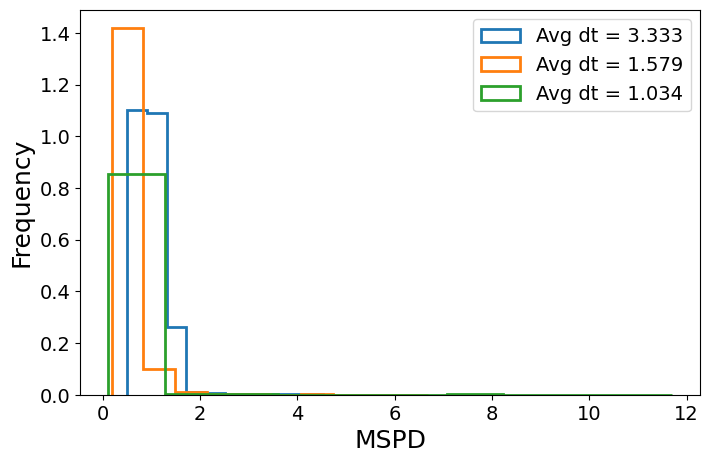

In [49]:
plt.figure(figsize=(8,5))
for t_samp in infer_out.t_samp_dist_idx.unique():
    plt.hist(infer_out[infer_out.t_samp_dist_idx==t_samp].MSPD.values, 
             histtype="step", label=f"Avg dt = {metadict['avg_dt'][int(t_samp)]:.3f}", 
             lw=2, density=True)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("MSPD", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

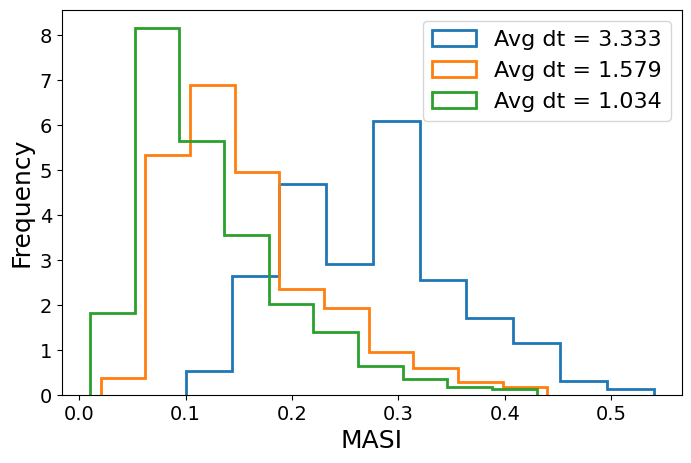

In [50]:
plt.figure(figsize=(8, 5))
for t_samp in infer_out.t_samp_dist_idx.unique():
    plt.hist(infer_out[infer_out.t_samp_dist_idx==t_samp].MASI.values, 
             histtype="step", label=f"Avg dt = {metadict['avg_dt'][int(t_samp)]:.3f}",
             lw=2, density=True)
plt.legend(loc="upper right", fontsize=16)
plt.xlabel("MASI", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

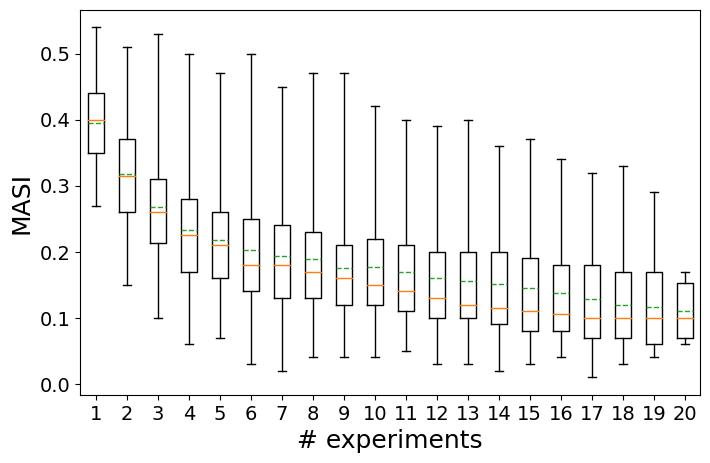

In [51]:
MASI = [infer_out[infer_out.n_init_cond==i]["MASI"].values \
        for i in infer_out.n_init_cond.unique()]

plt.figure(figsize=(8,5))
plt.boxplot(MASI, whis=(0, 100), meanline=True, showmeans=True)
plt.xlabel("# experiments", fontsize=18)
plt.ylabel("MASI", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [52]:
[len(list(combinations(df.init_cond_idx.unique(), i))[:50]) for i in range(1, 20)]

[20, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 20]

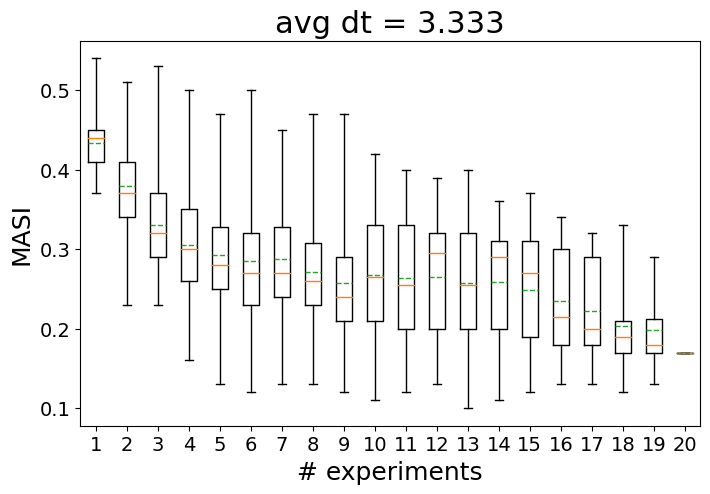

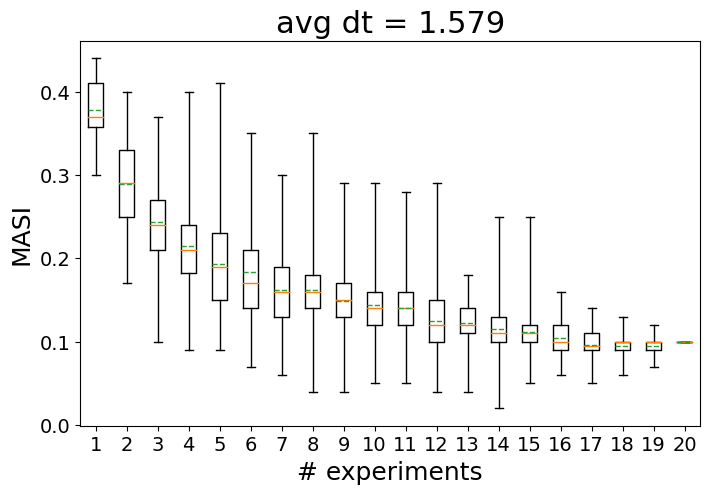

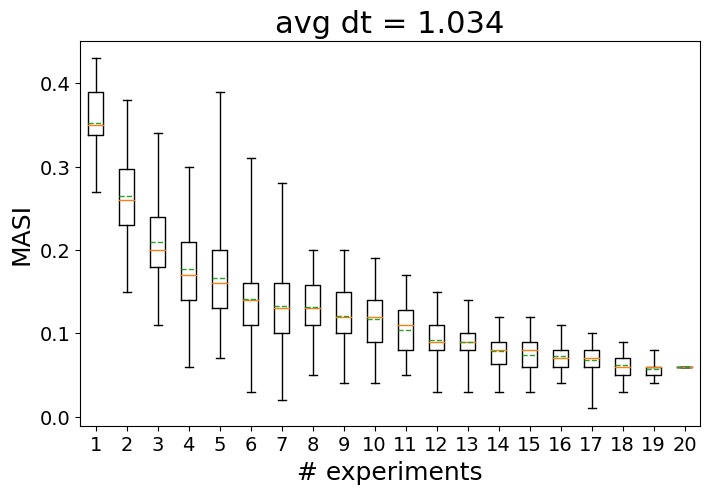

In [57]:
for t_samp in infer_out.t_samp_dist_idx.unique():
    MASI = [infer_out[(infer_out[["n_init_cond", "t_samp_dist_idx"]]==[i,t_samp]).all(axis=1)]["MASI"].values \
            for i in infer_out.n_init_cond.unique()]

    plt.figure(figsize=(8,5))
    plt.title(f"avg dt = {metadict['avg_dt'][int(t_samp)]:.3f}", fontsize=22)
    plt.boxplot(MASI, whis=(0, 100), meanline=True, showmeans=True)
    plt.xlabel("# experiments", fontsize=18)
    plt.ylabel("MASI", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

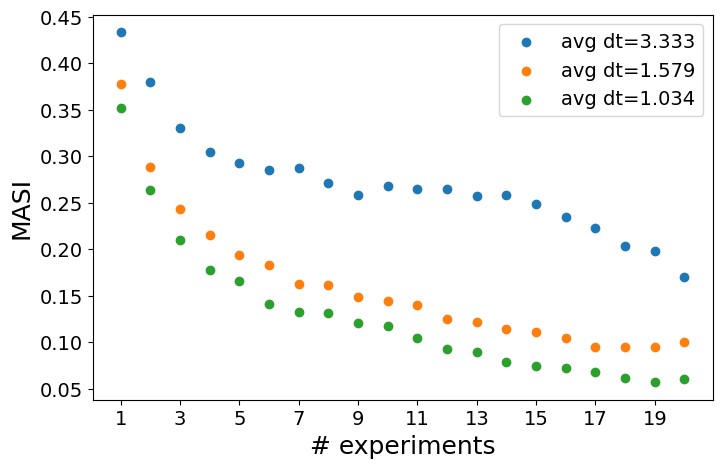

In [105]:
plt.figure(figsize=(8,5))

for t_samp in infer_out.t_samp_dist_idx.unique():
    MASI = [infer_out[(infer_out[["n_init_cond", "t_samp_dist_idx"]]==[i,t_samp]).all(axis=1)]["MASI"].values \
            for i in infer_out.n_init_cond.unique()]

    
    label = f"avg dt={metadict['avg_dt'][int(t_samp)]:.3f}"
    plt.scatter(np.arange(1, len(MASI)+1), [i.mean() for i in MASI], label=label)

plt.legend(loc="upper right", fontsize=14)
plt.xlabel("# experiments", fontsize=18)
plt.ylabel("MASI", fontsize=18)
plt.xticks(np.arange(1, len(MASI)+1, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.show()

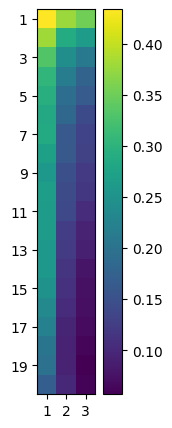

In [91]:
avgMASI = np.zeros((len(metadict["t_samp"]), len(metadict["init_cond"])))
for i in range(len(infer_out.t_samp_dist_idx.unique())):
    t_samp = infer_out.t_samp_dist_idx.unique()[i]
    for j in range(len(infer_out.n_init_cond.unique())):
        n_init_cond = infer_out.n_init_cond.unique()[j]
        avgMASI[i,j] = infer_out[(infer_out[["t_samp_dist_idx", "n_init_cond"]]==[t_samp, n_init_cond]).all(axis=1)]["MASI"].values.mean()

plt.figure(figsize=(2, 5))
plt.imshow(avgMASI.T)
plt.xticks(np.arange(0, i+1, 1), np.arange(1, i+2, 1))
plt.yticks(np.arange(0, j+1, 2), np.arange(1, j+2, 2))
plt.colorbar()

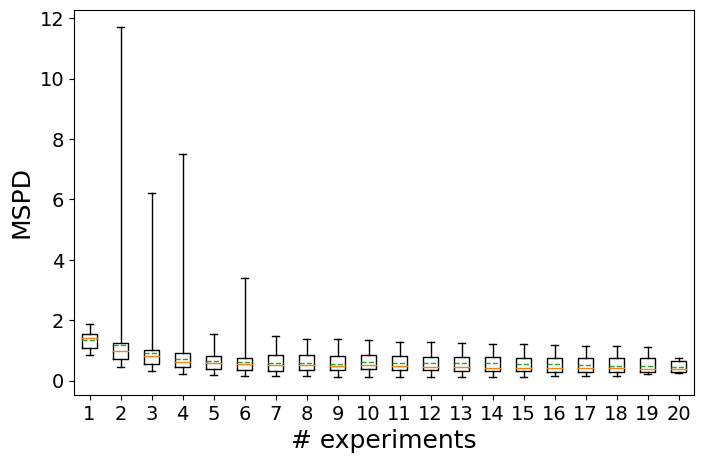

In [54]:
MSPD = [infer_out[infer_out.n_init_cond==i]["MSPD"].values \
        for i in infer_out.n_init_cond.unique()]

plt.figure(figsize=(8,5))
plt.boxplot(MSPD, whis=(0, 100), meanline=True, showmeans=True)
plt.xlabel("# experiments", fontsize=18)
plt.ylabel("MSPD", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()